# Klasifikasi K-Nearest Neighbour (KNN)
### Dengan K = 4
Sumber : https://github.com/kk7nc/Text_Classification#id34 (Dengan Perubahan)

## Import module / package

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/tweets_labelled_tokenized_nltk.csv")
# df = pd.read_csv(r"data/tweets_labelled_tokenized_sastrawi.csv")
# df2 = pd.read_csv(r"data/tweets_labelled_tokenized_ecs.csv")
df.head()

,tweet,sentimen
0,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
1,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
2,"['wakil', 'mpr', 'ri', 'mahasiswa', 'kawal', '...",Negatif
3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Negatif
4,"['tanggal', 'chatnya', 'april', 'dijerat']",Negatif


In [3]:
# df2.head()

In [4]:
def merge_neutral(text):
    if text == "Netral":
        return "Positif"
    if text == "Positif":
        return "Positif"
    else:
        return "Negatif"

df['sentimen'] = df['sentimen'].apply(merge_neutral)
df

,tweet,sentimen
0,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
1,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
2,"['wakil', 'mpr', 'ri', 'mahasiswa', 'kawal', '...",Negatif
3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Negatif
4,"['tanggal', 'chatnya', 'april', 'dijerat']",Negatif
...,...,...
15627,"['koordinator', 'forum', 'perempuan', 'indones...",Positif
15628,"['dinilai', 'penuhi', 'harapan', 'kaum', 'pere...",Positif
15629,"['keberadaan', 'payung', 'hukum', 'merehabilit...",Positif
15630,"['menyebut', 'kehadiran', 'wujud', 'keberpihak...",Positif


## Split Data (Test & Train)

In [5]:
train_X_df, test_X_df, train_Y_df, test_Y_df = model_selection.train_test_split(df['tweet'], df['sentimen'], test_size = 0.1, random_state = 42)
# train_X_df2, test_X_df2, train_Y_df2, test_Y_df2 = model_selection.train_test_split(df2['tweet'], df2['sentimen'], test_size = 0.1, random_state = 42)

In [6]:
data_train = pd.DataFrame()
data_train['tweet'] = train_X_df
data_train['sentimen'] = train_Y_df

data_test = pd.DataFrame()
data_test['tweet'] = test_X_df
data_test['sentimen'] = test_Y_df

# data_train_2 = pd.DataFrame()
# data_train_2['tweet'] = train_X_df2
# data_train['sentimen'] = train_Y_df2

# data_test_2 = pd.DataFrame()
# data_test_2['tweet'] = test_X_df2
# data_test_2['sentimen'] = test_Y_df2

## Klasifikasi Data dengan KNN (K = 4) dan Menampilkan Akurasi

### Dataset DF (_Stemming Nazief_)

In [7]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier(n_neighbors=4)),
                     ])

text_clf.fit(train_X_df, train_Y_df)
predicted = text_clf.predict(test_X_df)

train_Y_df_cross = train_Y_df.replace("Positif",1).replace("Negatif",0)

from sklearn.model_selection import cross_val_score
print("Akurasi K-Fold Cross Validation (10 Fold): "+str(cross_val_score(text_clf, train_X_df, train_Y_df_cross, cv=10, n_jobs=6, scoring="accuracy").mean()*100)+" %")

print("\n\n")

print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df, predicted)*100, "%")
print("K-Nearest Neighbors Precision:", precision_score(test_Y_df, predicted, average="binary",
                                                        pos_label="Positif")*100, "%")
print("K-Nearest Neighbors Recall:", recall_score(test_Y_df, predicted, average="binary",
                                                  pos_label="Positif")*100, "%")
print("K-Nearest Neighbors f1_score:", f1_score(test_Y_df, predicted, average="binary",
                                                pos_label="Positif")*100, "%")

print(f'Confusion Matrix:\n {confusion_matrix(test_Y_df, predicted)}')
print('====================================================\n')
print(classification_report(test_Y_df, predicted, zero_division=0))

Akurasi K-Fold Cross Validation (10 Fold): 87.01307019060359 %



K-Nearest Neighbors Accuracy: 88.81074168797954 %
K-Nearest Neighbors Precision: 89.31899641577061 %
K-Nearest Neighbors Recall: 97.95597484276729 %
K-Nearest Neighbors f1_score: 93.43832020997377 %
Confusion Matrix:
 [[ 143  149]
 [  26 1246]]

              precision    recall  f1-score   support

     Negatif       0.85      0.49      0.62       292
     Positif       0.89      0.98      0.93      1272

    accuracy                           0.89      1564
   macro avg       0.87      0.73      0.78      1564
weighted avg       0.88      0.89      0.88      1564



K-Nearest Neighbors Accuracy: 88.81074168797954 %


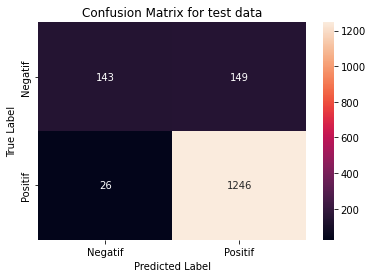

In [8]:
print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df, predicted)*100, "%")

conf_mat = confusion_matrix(test_Y_df, predicted)
class_label = ["Negatif","Positif"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Dataset DF2 (_Stemming ECS_)

In [9]:
# text_clf = Pipeline([('vect', CountVectorizer()),
#                      ('tfidf', TfidfTransformer()),
#                      ('clf', KNeighborsClassifier(n_neighbors=10)),
#                      ])

# text_clf.fit(train_X_df2, train_Y_df2)
# predicted = text_clf.predict(test_X_df2)

# print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df2, predicted)*100, "%")
# print("K-Nearest Neighbors Precision:", precision_score(test_Y_df2, predicted, average="binary", pos_label="Positif")*100, "%")
# print("K-Nearest Neighbors Recall:", recall_score(test_Y_df2, predicted, average="binary", pos_label="Positif")*100, "%")
# print("K-Nearest Neighbors f1_score:", f1_score(test_Y_df2, predicted, average="binary", pos_label="Positif")*100, "%")

# print(f'Confusion Matrix:\n {confusion_matrix(test_Y_df2, predicted)}')
# print('====================================================\n')
# print(classification_report(test_Y_df2, predicted, zero_division=0))

In [10]:
# print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df2, predicted)*100, "%")

# conf_mat = confusion_matrix(test_Y_df2, predicted)
# class_label = ["Negatif","Positif"]
# test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
# sns.heatmap(test, annot = True, fmt = "d")
# plt.title("Confusion Matrix for test data")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

In [11]:
train_Y_df_bin = train_Y_df.replace("Negatif", 0).replace("Positif", 1)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(text_clf, train_X_df, train_Y_df_bin, cv = 50, scoring='accuracy', n_jobs=12)
scores
print("Akurasi SVM Kernel Linear Menggunakan K-Fold Cross Validation : "+str(scores.mean()*100)+" %")

Akurasi SVM Kernel Linear Menggunakan K-Fold Cross Validation : 87.2336639660786 %
